# Linear Regression
---
## **Single Linear Regression**
특성이 하나일 경우 하나의 feature를 통해 target을 예측한다.<br/>
 (혼공 130p~138p)<br/><br/>

목표: 농어의 길이 데이터를 통해 무게를 예측해보자.<br/>

  ### Read CSV file

In [1]:
import pandas as pd
import numpy as np

# length, height, width
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')
print(df.head())

perch_length = df.iloc[:, 0].to_numpy()

# target bariable
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 열 수 확인
print(df.shape)
print(perch_length.shape)
print(perch_weight.shape)

   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94
(56, 3)
(56,)
(56,)


### EDA
농어 데이터 분포를 눈으로 확인한다.

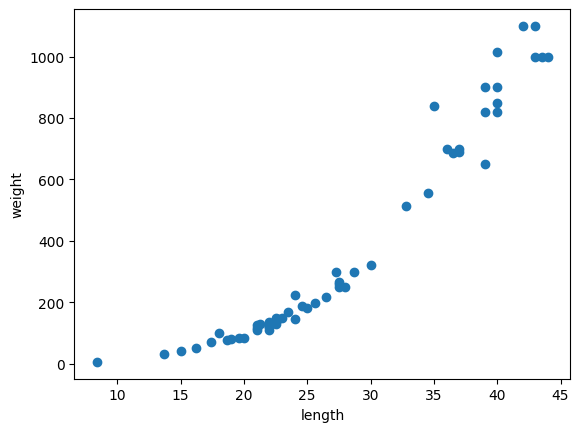

In [12]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### train data, test data 준비
input data는 2차원 배열, target data는 1차원 배열로 shape을 조정한다.

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# input data 2차원 배열로 차원 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape)
print(test_input.shape)

print(train_target.shape)
print(test_target.shape)

(42, 1)
(14, 1)
(42,)
(14,)


### 모델 학습 및 평가

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_input, train_target)
print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.939846333997604
0.8247503123313558


학습 결과 모델이 너무 단순하며, **과소적합**되었음을 알 수 있다.
>- Overfitting<br/>
  train data에 과적합되어, 훈련 모델에만 잘 맞는 모델
- Underfitting<br/>
  모델이 너무 단순하여, test data에서 더 좋은 성능을 보이거나, train, test 둘 모두에서 성능이 좋지 않은 모델


### 학습에 사용된 직선 방정식 찾기

In [10]:
print(model.coef_)
print(model.intercept_)

[39.01714496]
-709.0186449535477


### plot

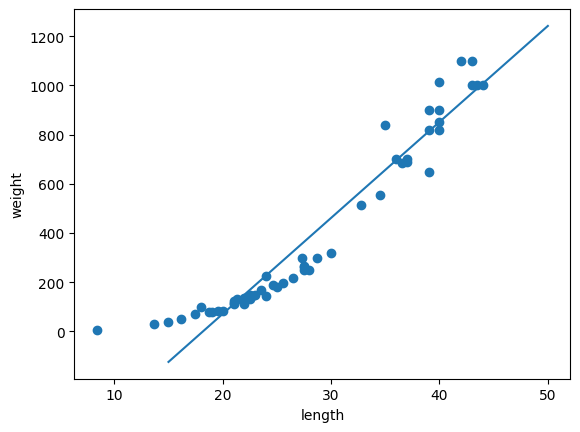

In [13]:
plt.plot([15,50], [15*model.coef_+model.intercept_, 50*model.coef_+model.intercept_])
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

결과를 통해 농어 분포는 직선보다, 곡선에 가깝기 때문에 해당 모델은 너무 단순하다는 것을 알 수 있다.<br/>
다음에는 최적의 곡선 모델을 찾아보자.